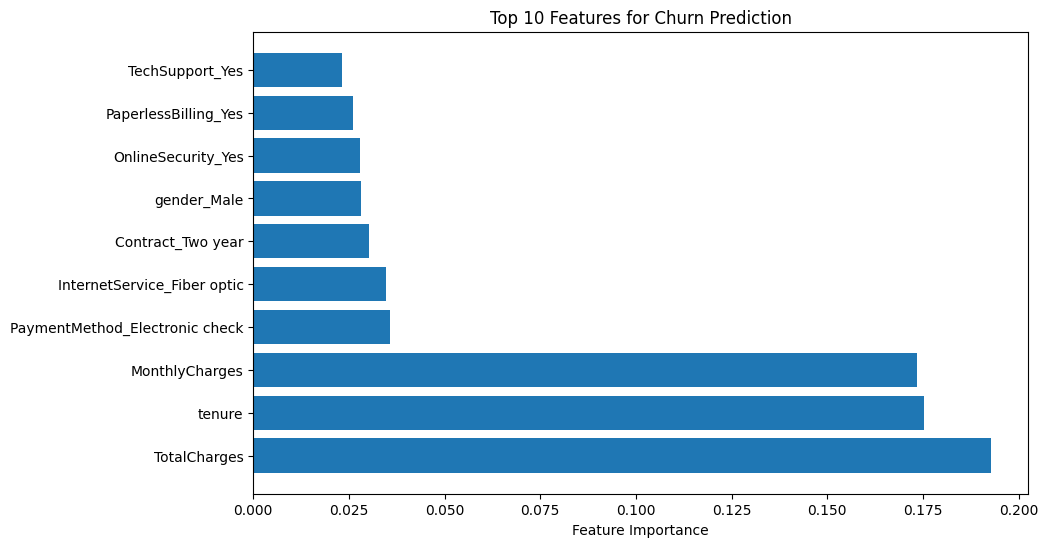

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("Telco-Customer-Churn.csv")


# List of categorical columns to one-hot encode
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform one-hot encoding for the specified columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the dataset into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N important features
top_n = 10  # Change this number to display more or fewer features
top_features = feature_importance_df.head(top_n)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features for Churn Prediction')
plt.show()


In [5]:
print(data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

# Data Preprocessing (as you've already done)
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype(float)

# Select the top important features
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                       'MultipleLines_No phone service', 'MultipleLines_Yes',
                       'InternetService_Fiber optic', 'InternetService_No',
                       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                       'TechSupport_No internet service', 'TechSupport_Yes',
                       'StreamingTV_No internet service', 'StreamingTV_Yes',
                       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
                       'PaymentMethod_Credit card (automatic)',
                       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = data[selected_features]
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ... (previous code)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance with 'Yes' as the positive label
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7746979388770433
Precision: 0.6
Recall: 0.4572192513368984
F1 Score: 0.5189681335356601


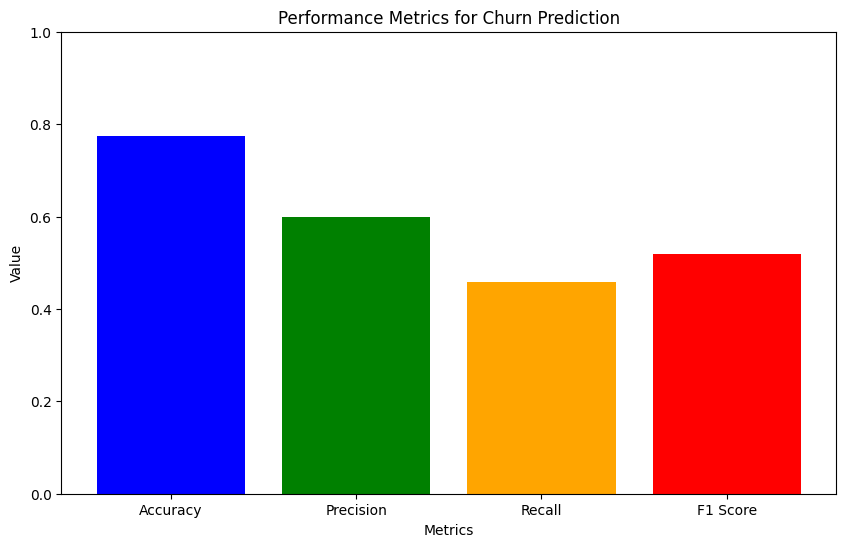

In [7]:
# Labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Values for each metric
values = [accuracy, precision, recall, f1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Metrics for Churn Prediction')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for clarity
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

# Data Preprocessing (as you've already done)
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype(float)

# Select the top important features
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                       'MultipleLines_No phone service', 'MultipleLines_Yes',
                       'InternetService_Fiber optic', 'InternetService_No',
                       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                       'TechSupport_No internet service', 'TechSupport_Yes',
                       'StreamingTV_No internet service', 'StreamingTV_Yes',
                       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
                       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
                       'PaymentMethod_Credit card (automatic)',
                       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = data[selected_features]
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ... (previous code)

# Initialize the SVM classifier

svm_classifier = SVC(kernel='poly', degree=3, C=1.0, random_state=42)


# Fit the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance with 'Yes' as the positive label
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7825159914712153
Precision: 0.6954022988505747
Recall: 0.3235294117647059
F1 Score: 0.4416058394160584


In [10]:
import tkinter as tk
from tkinter import ttk
from sklearn.svm import SVC
import pandas as pd


# Create a function to predict churn
def predict_churn():
    # Get user input for the selected features
    tenure = float(entry_tenure.get())
    monthly_charges = float(entry_monthly_charges.get())
    total_charges = float(entry_total_charges.get())

    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({'tenure': [tenure],
                               'MonthlyCharges': [monthly_charges],
                               'TotalCharges': [total_charges]})

    # Scale the input data using the same method as the training data
    input_data[selected_features] = (input_data[selected_features] - data[selected_features].mean()) / data[selected_features].std()

    # Make the prediction
    prediction = svm_classifier.predict(input_data)

    # Display the prediction in the UI
    result_label.config(text=f"Churn Prediction: {'Yes' if prediction[0] == 1 else 'No'}")

# Create the main application window
root = tk.Tk()
root.title("Customer Churn Prediction")

# Create labels and entry fields for input
tenure_label = ttk.Label(root, text="Tenure:")
tenure_label.pack()
entry_tenure = ttk.Entry(root)
entry_tenure.pack()

monthly_charges_label = ttk.Label(root, text="Monthly Charges:")
monthly_charges_label.pack()
entry_monthly_charges = ttk.Entry(root)
entry_monthly_charges.pack()

total_charges_label = ttk.Label(root, text="Total Charges:")
total_charges_label.pack()
entry_total_charges = ttk.Entry(root)
entry_total_charges.pack()

# Create a button to make predictions
predict_button = ttk.Button(root, text="Predict Churn", command=predict_churn)
predict_button.pack()

# Create a label to display the prediction
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()


c:\Python\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Python\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
